In [6]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import hashlib
import numpy as np
import matplotlib.pyplot as plt

/kaggle/input/fake-hr-adatok/fake hr adatok.xlsx


In [8]:
fake_hr_adatok = pd.read_excel('/kaggle/input/fake-hr-adatok/fake hr adatok.xlsx')

fake_hr_adatok

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,41,Sales,2,1,Female,3,4,5993,3,6,65437,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com
4,Roy Hill,27,Research & Development,1,7,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,54,Research & Development,4,126,Female,3,3,13549,3,4,14386,williamhardy@wilson.com
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,4999,4,3,10496,madison45@jones.com
97,Sandra Fisher,28,Sales,3,129,Male,3,3,4221,3,5,38035,mark93@peters.biz
98,Jasmine Bartlett,58,Sales,4,131,Male,3,3,13872,3,37,99544,alicefrancis@hall.net


# Hashing

In [4]:
#beépített hash függvény: gyakran használt SHA-256 hashing algorithm
def hash_string(s):
    return hashlib.sha256(str(s).encode()).hexdigest()

In [5]:
#adat maszkolás, nem/nehezen visszafordítható
fake_hr_adatok['EmployeeNumber'] = fake_hr_adatok['EmployeeNumber'].apply(hash_string)
fake_hr_adatok.head()

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,41,Sales,2,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...,Female,3,4,5993,3,6,65437,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,d4735e3a265e16eee03f59718b9b5d03019c07d8b6c51f...,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com
2,Andrew Morgan,37,Research & Development,2,4b227777d4dd1fc61c6f884f48641d02b4d121d3fd328c...,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com
3,Ryan Hayes,33,Research & Development,4,ef2d127de37b942baad06145e54b0c619a1f22327b2ebb...,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com
4,Roy Hill,27,Research & Development,1,7902699be42c8a8e46fbbb4501726517e86b22c56a189f...,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com


# Randomizálás, shuffling

In [7]:
fake_hr_adatok['MonthlyIncome'] = fake_hr_adatok['MonthlyIncome'].sample(frac=1).reset_index(drop=True)
fake_hr_adatok

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,41,Sales,2,1,Female,3,4,9619,3,6,65437,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,2,Male,2,2,13503,4,10,29211,itaylor@snow-olsen.com
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2703,3,0,21410,connieadams@wheeler-mueller.com
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2206,3,8,67099,sheilaevans@mercado-jones.com
4,Roy Hill,27,Research & Development,1,7,Male,3,2,9526,3,2,25397,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,54,Research & Development,4,126,Female,3,3,4221,3,4,14386,williamhardy@wilson.com
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,9980,4,3,10496,madison45@jones.com
97,Sandra Fisher,28,Sales,3,129,Male,3,3,1232,3,5,38035,mark93@peters.biz
98,Jasmine Bartlett,58,Sales,4,131,Male,3,3,2909,3,37,99544,alicefrancis@hall.net


# Általánosítás, generalization

In [28]:
anonim['Zipcode']

0     65000
1     29000
2     21000
3     67000
4     25000
      ...  
95    14000
96    10000
97    38000
98    99000
99    17000
Name: Zipcode, Length: 100, dtype: object

In [27]:
eredeti['Zipcode']

0     65437
1     29211
2     21410
3     67099
4     25397
      ...  
95    14386
96    10496
97    38035
98    99544
99    17077
Name: Zipcode, Length: 100, dtype: int64

In [25]:
# csak az első két számot mutatja
fake_hr_adatok['Zipcode'] = fake_hr_adatok['Zipcode'].apply(lambda x: str(x)[:2] + '000')
fake_hr_adatok

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,41,Sales,2,1,Female,3,4,5993,3,6,65000,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29000,itaylor@snow-olsen.com
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2090,3,0,21000,connieadams@wheeler-mueller.com
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2909,3,8,67000,sheilaevans@mercado-jones.com
4,Roy Hill,27,Research & Development,1,7,Male,3,2,3468,3,2,25000,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,54,Research & Development,4,126,Female,3,3,13549,3,4,14000,williamhardy@wilson.com
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,4999,4,3,10000,madison45@jones.com
97,Sandra Fisher,28,Sales,3,129,Male,3,3,4221,3,5,38000,mark93@peters.biz
98,Jasmine Bartlett,58,Sales,4,131,Male,3,3,13872,3,37,99000,alicefrancis@hall.net


# Zaj

In [4]:
fake_hr_adatok['Age'] = fake_hr_adatok['Age'] + np.random.randint(-2, 2, fake_hr_adatok.shape[0])
fake_hr_adatok

,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email
0,Jason Taylor,39,Sales,2,1,Female,3,4,5993,3,6,65437,dalejennings@brown.com
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com
2,Andrew Morgan,35,Research & Development,2,4,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com
3,Ryan Hayes,31,Research & Development,4,5,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com
4,Roy Hill,25,Research & Development,1,7,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,52,Research & Development,4,126,Female,3,3,13549,3,4,14386,williamhardy@wilson.com
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,4999,4,3,10496,madison45@jones.com
97,Sandra Fisher,28,Sales,3,129,Male,3,3,4221,3,5,38035,mark93@peters.biz
98,Jasmine Bartlett,57,Sales,4,131,Male,3,3,13872,3,37,99544,alicefrancis@hall.net


**Gaussian Noise**
nullás átlaggal és kettes szórással, 
egészre kerekítve

In [10]:
# átlag=0 szórás=2
fake_hr_adatok['Anonymized_Age'] = fake_hr_adatok['Age'] + np.random.normal(0, 2, size=len(fake_hr_adatok))

# egészre kerekítés és mínusz értékek 0-ra cserélése
fake_hr_adatok['Anonymized_Age'] = fake_hr_adatok['Anonymized_Age'].round().clip(lower=0)

print(fake_hr_adatok[['Age', 'Anonymized_Age']].head())
fake_hr_adatok

   Age  Anonymized_Age
0   41            43.0
1   49            50.0
2   37            36.0
3   33            33.0
4   27            25.0


,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email,Age_Group,Anonymized_Age
0,Jason Taylor,41,Sales,2,1,Female,3,4,5993,3,6,65437,dalejennings@brown.com,41-50,43.0
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com,41-50,50.0
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com,31-40,36.0
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com,31-40,33.0
4,Roy Hill,27,Research & Development,1,7,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com,21-30,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,54,Research & Development,4,126,Female,3,3,13549,3,4,14386,williamhardy@wilson.com,51-60,56.0
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,4999,4,3,10496,madison45@jones.com,21-30,25.0
97,Sandra Fisher,28,Sales,3,129,Male,3,3,4221,3,5,38035,mark93@peters.biz,21-30,28.0
98,Jasmine Bartlett,58,Sales,4,131,Male,3,3,13872,3,37,99544,alicefrancis@hall.net,51-60,59.0


# Általánosítás, Binning
"Binning into Equal-Frequency Quantile Bins"

In [30]:
fake_hr_adatok['Age'] = pd.to_numeric(fake_hr_adatok['Age'], errors='coerce')

# kvantilisek alapján 4 csoport "fiatal", "középkorú", "idős", "nyugdíjas"
fake_hr_adatok['anon_age'] = pd.qcut(fake_hr_adatok['Age'], q=4, labels=["fiatal", "középkorú", "idős", "nyugdíjas"])

print(fake_hr_adatok[['Age', 'anon_age']].head())
fake_hr_adatok

   Age   anon_age
0   41       idős
1   49  nyugdíjas
2   37       idős
3   33  középkorú
4   27     fiatal


,Name,Age,Department,Education,EmployeeNumber,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,PerformanceRating,YearsAtCompany,Zipcode,Email,anon_age
0,Jason Taylor,41,Sales,2,1,Female,3,4,5993,3,6,65437,dalejennings@brown.com,idős
1,Andre Chan,49,Research & Development,1,2,Male,2,2,5130,4,10,29211,itaylor@snow-olsen.com,nyugdíjas
2,Andrew Morgan,37,Research & Development,2,4,Male,2,3,2090,3,0,21410,connieadams@wheeler-mueller.com,idős
3,Ryan Hayes,33,Research & Development,4,5,Female,3,3,2909,3,8,67099,sheilaevans@mercado-jones.com,középkorú
4,Roy Hill,27,Research & Development,1,7,Male,3,2,3468,3,2,25397,orozcopaul@hamilton.com,fiatal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Benjamin Miller,54,Research & Development,4,126,Female,3,3,13549,3,4,14386,williamhardy@wilson.com,nyugdíjas
96,Stanley Gonzalez,24,Sales,2,128,Female,3,3,4999,4,3,10496,madison45@jones.com,fiatal
97,Sandra Fisher,28,Sales,3,129,Male,3,3,4221,3,5,38035,mark93@peters.biz,fiatal
98,Jasmine Bartlett,58,Sales,4,131,Male,3,3,13872,3,37,99544,alicefrancis@hall.net,nyugdíjas


**Csoportosítás meghatározott közökkel**

In [32]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ["0-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71+"]

fake_hr_adatok['anon_age'] = pd.cut(fake_hr_adatok['Age'], bins=bins, labels=labels)

print(fake_hr_adatok[['Age', 'anon_age']].head())

   Age anon_age
0   41    41-50
1   49    41-50
2   37    31-40
3   33    31-40
4   27    21-30


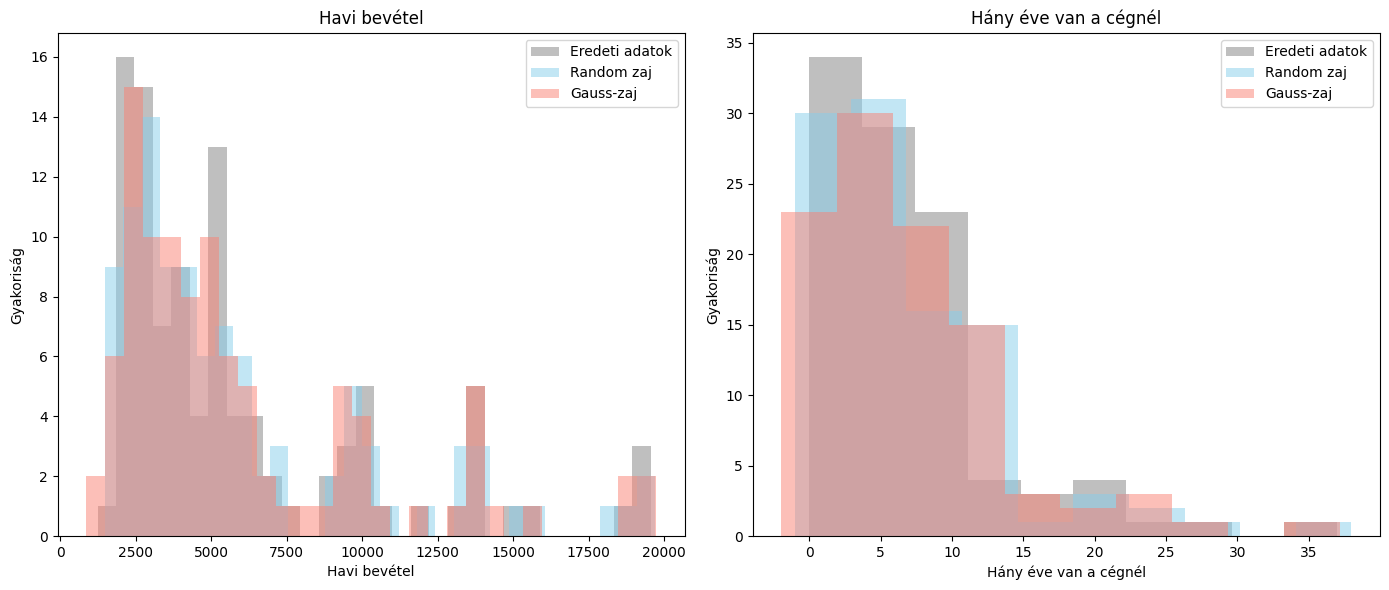

In [22]:
random_monthly_income = fake_hr_adatok['MonthlyIncome'] + np.random.randint(-500, 500, fake_hr_adatok.shape[0])
gaussian_monthly_income = fake_hr_adatok['MonthlyIncome'] + np.random.normal(0, 250, fake_hr_adatok.shape[0])

random_years_at_company = fake_hr_adatok['YearsAtCompany'] + np.random.randint(-2, 2, fake_hr_adatok.shape[0])
gaussian_years_at_company = fake_hr_adatok['YearsAtCompany'] + np.random.normal(0, 1, fake_hr_adatok.shape[0])
plt.figure(figsize=(14, 6))

# Havi bevétel
plt.subplot(1, 2, 1)
plt.hist(fake_hr_adatok['MonthlyIncome'], bins=30, alpha=0.5, label="Eredeti adatok", color="gray")
plt.hist(random_monthly_income, bins=30, alpha=0.5, label="Random zaj", color="skyblue")
plt.hist(gaussian_monthly_income, bins=30, alpha=0.5, label="Gauss-zaj", color="salmon")
plt.xlabel("Havi bevétel")
plt.ylabel("Gyakoriság")
plt.title("Havi bevétel")
plt.legend()

# Hány éve van a cégnél
plt.subplot(1, 2, 2)
plt.hist(fake_hr_adatok['YearsAtCompany'], bins=10, alpha=0.5, label="Eredeti adatok", color="gray")
plt.hist(random_years_at_company, bins=10, alpha=0.5, label="Random zaj", color="skyblue")
plt.hist(gaussian_years_at_company, bins=10, alpha=0.5, label="Gauss-zaj", color="salmon")
plt.xlabel("Hány éve van a cégnél")
plt.ylabel("Gyakoriság")
plt.title("Hány éve van a cégnél")
plt.legend()

plt.tight_layout()
plt.show()


# Idősoros adatok eltolása

**ez nem fut le csak példának másoltam ki egy oldalról**

In [ ]:
from datetime import timedelta

hr_adatok = pd.DataFrame({
    'Dátum': pd.date_range(start='2022-01-01', periods=10, freq='D')
})

#eltoljuk öt nappal, két hónappal és három évvel
nap = 5
honap = 2
ev = 3

hr_adatok['anon_datum'] = (
    data['Dátum'] 
    + pd.DateOffset(years=ev, months=honap) 
    + timedelta(days=nap))